In [2]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("ETH")

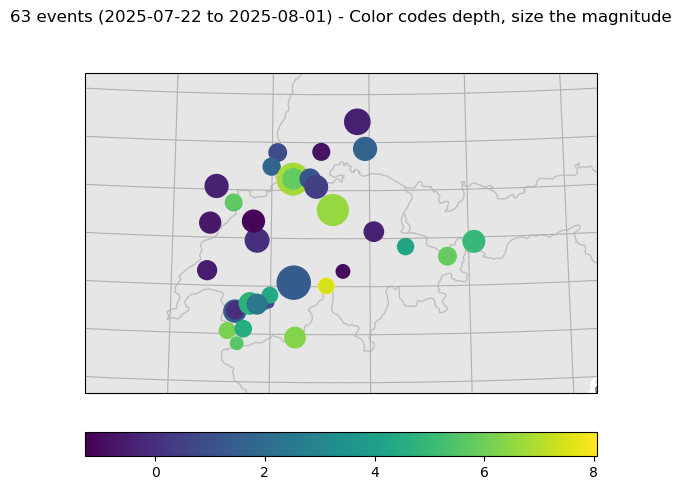

In [5]:
start_time = UTCDateTime("2025-07-22T15:51:20")

cat = client.get_events(start=start_time-3, end=start_time+10*86400) # für längeren Zeitraum
cat.plot("local",label=None);

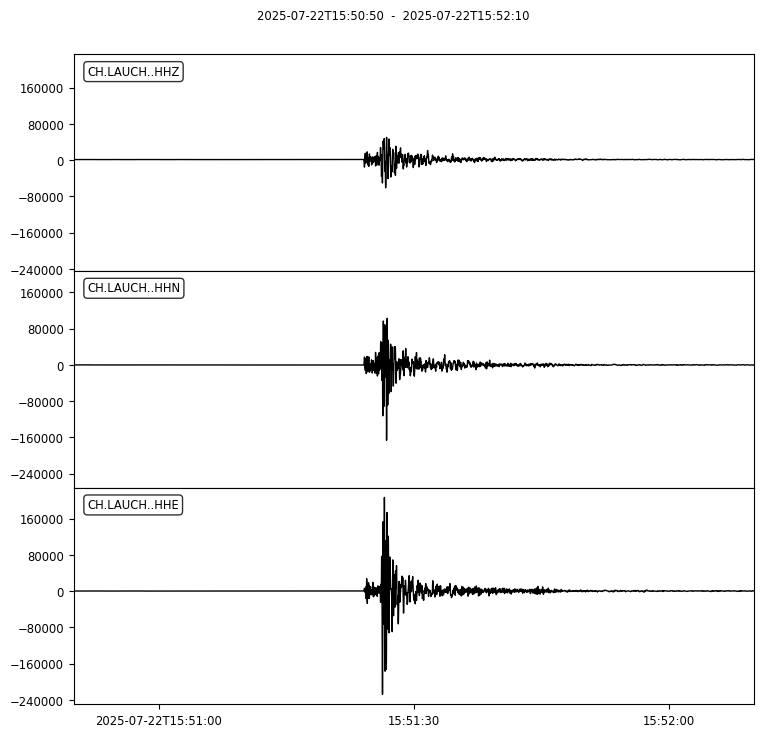

In [6]:
# Wir können Erdbebendaten von beliebigen Stationen und Seismometern herunterladen.

# Wir können einen Zeitpunkt eingeben von dem wir Daten laden wollen, z.B. nach einem Erdbeben in der Schweiz (Muerren BE, Magnitude 3.3)
start_time = UTCDateTime("2025-07-22T15:51:20")

# Mehr Information sind hier: http://seismo.ethz.ch/en/earthquakes/switzerland/eventpage.html?originId=%27c21pOmNoLmV0aHouc2VkL3NjMjBhZy9PcmlnaW4vTkxMLjIwMjUwODEyMTAzNTE5LjUxMDg5Mi4xMjAxMjU=%27&date_ch=2025-07-22&time_ch=17:51&region=Muerren%20BE&magnitude=3.3

# Und dann laden wir Daten von einem bestimmten Seismometer zu diesem Zeitpunkt herunter.
# Um den Seismometer zu identifizieren hat jeder Sensor einen Code aus
# Netzwerk (network) z.B. "CH" das Schweiz. Netwerk
# Station (station) z.B. "LAUCH"
# Kanal (channel) z.B. "HHZ" was der Aufzeichnung entlang der vertikalen Richtung/Komponente eines Breitbandseismometers entspricht
# Siehe auch http://www.seismo.ethz.ch/de/monitoring/national-seismic-network/

# Die Daten werden in einem Stream gespeichert,
# welcher ein oder mehrere Seismogramme, sowie Metadaten wie Informationen über den Seismometer und Zeiten, enthält
stream = client.get_waveforms(
    network="CH",
    station="LAUCH",
    location="*",
    channel="HH*",   #
    starttime=start_time-30,
    endtime=start_time+50,
    attach_response=True
)

# Wir können die Aufzeichnungen plotten und sehen die Bodenbewegung die vom Seismometer aufgezeichnet wurde
# entlang der vertikale (HHZ), Ost-West (HHE), und Nord-Süd (HHN) Komponente
stream.plot();

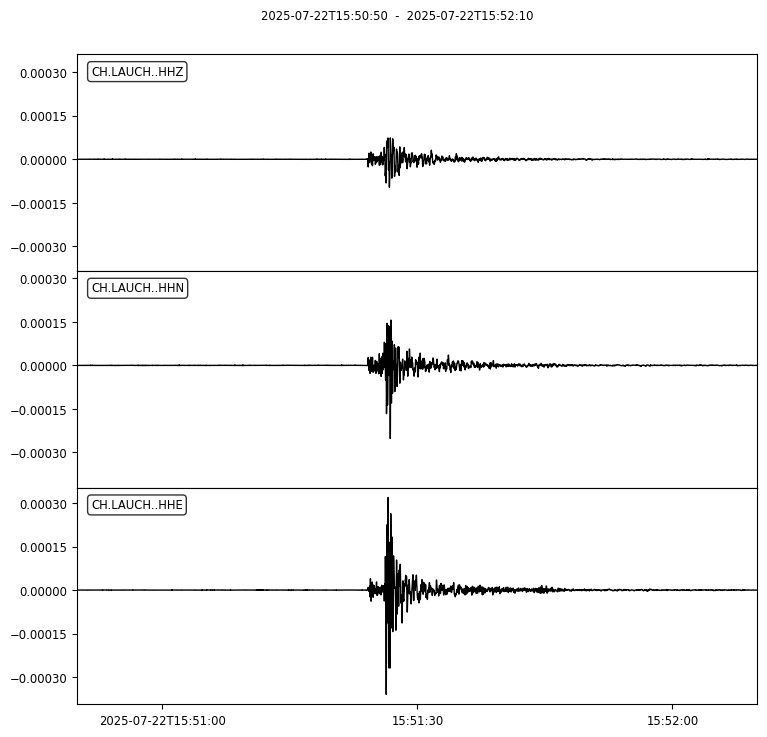

In [7]:
# Desweiteren bereiten wir die Daten vor, dieser Schritt wandelt die Aufzeichnungen des Seismometers in physikalische Einheiten um
# hier in Meter pro Sekunde (Velocity)
stream.remove_response(output="VEL")

# Wir plotten ausgewählte Seismogram
stream.plot();


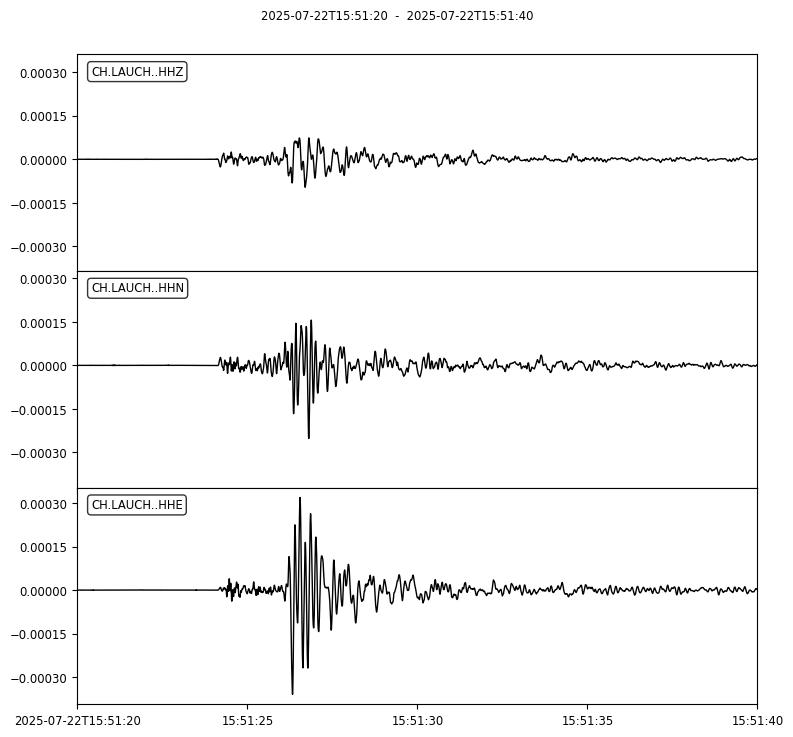

In [8]:
# Und das Seismogram noch kürzen
stream.trim(start_time, start_time+20);

# Und es erneut plotten
stream.plot();

# Frage: Welche Wellentypen können erkannt werden, und auf welcher Komponente?

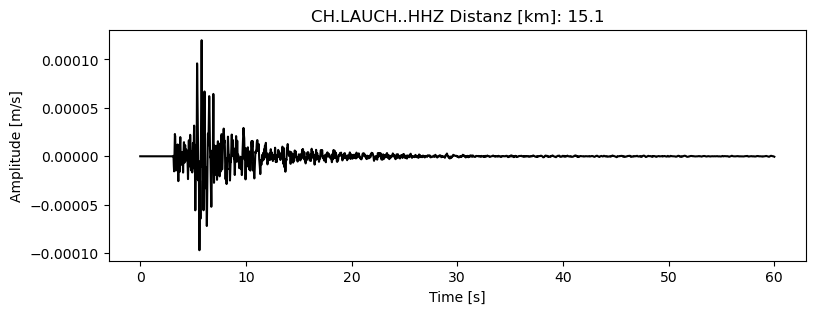

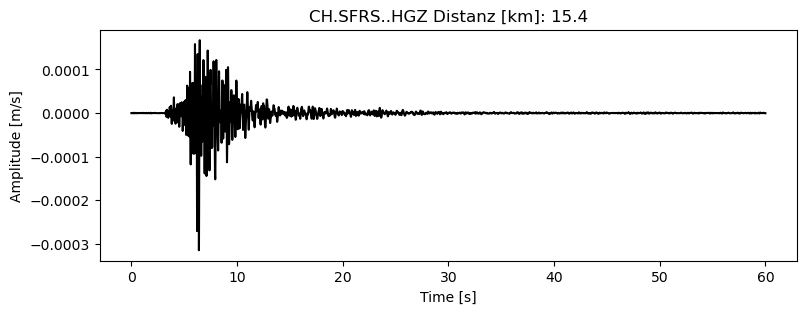

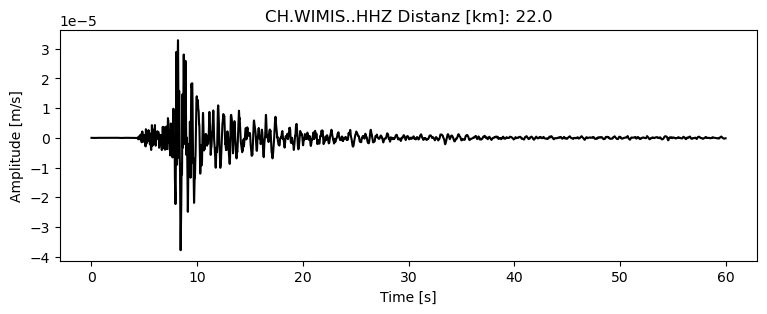

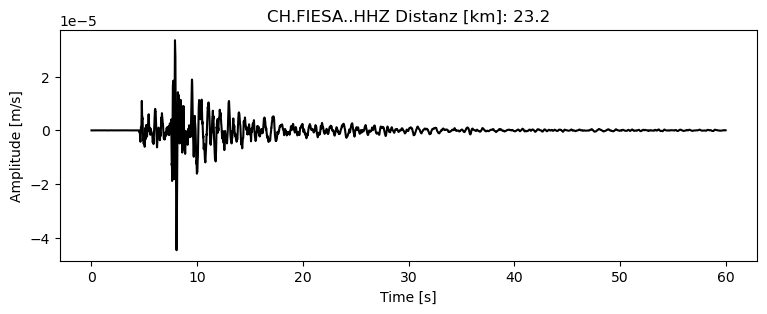

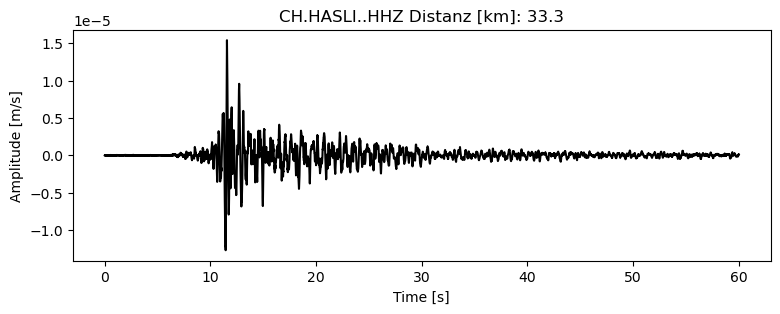

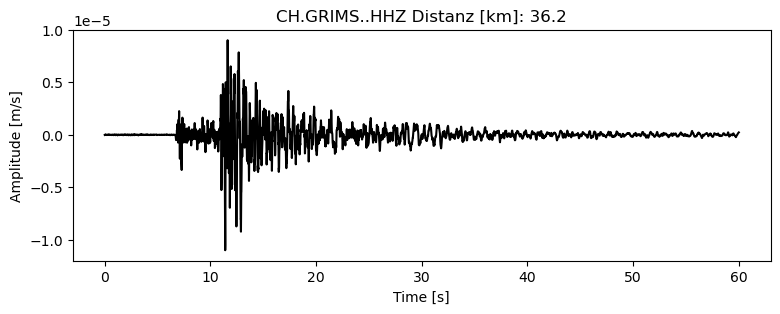

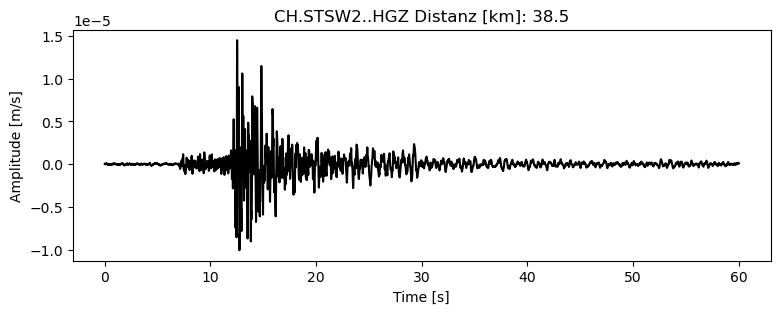

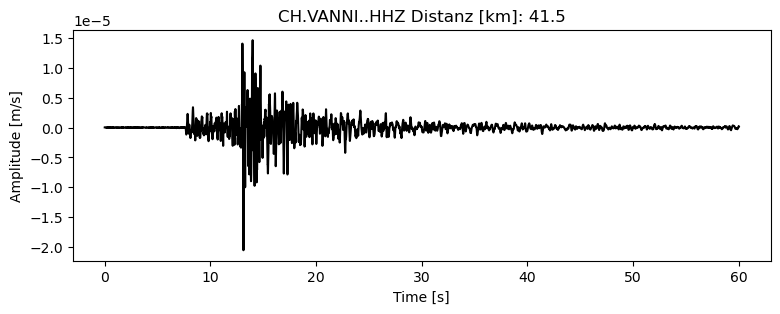

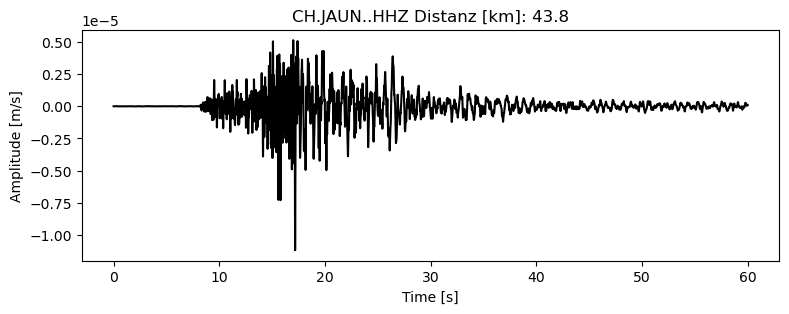

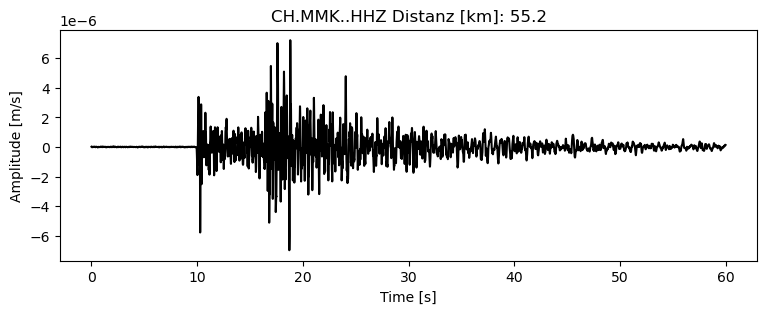

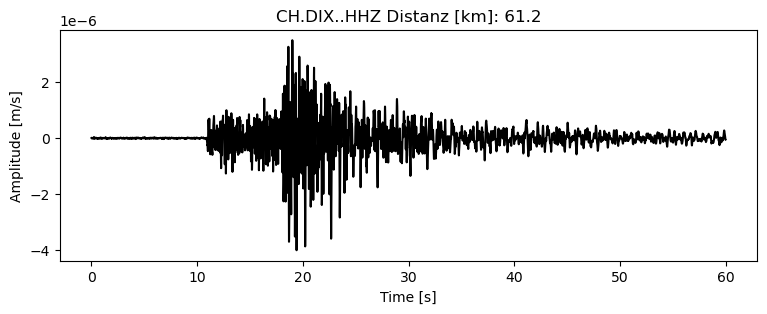

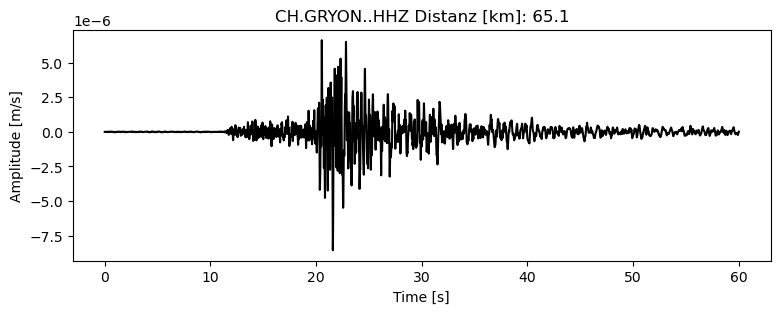

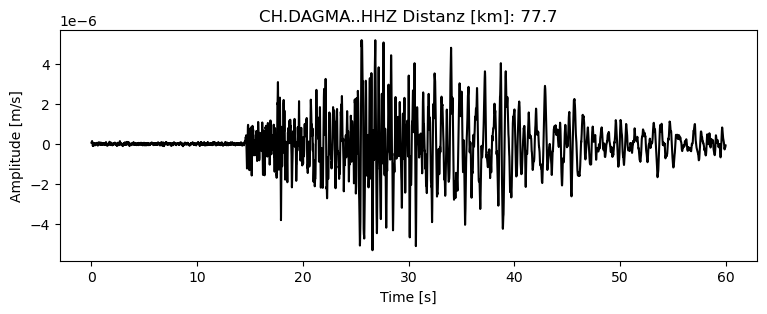

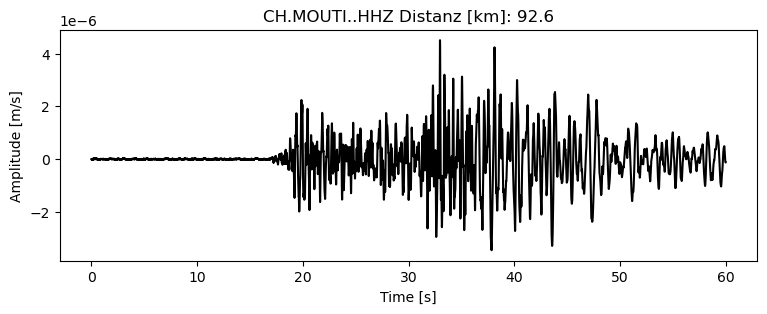

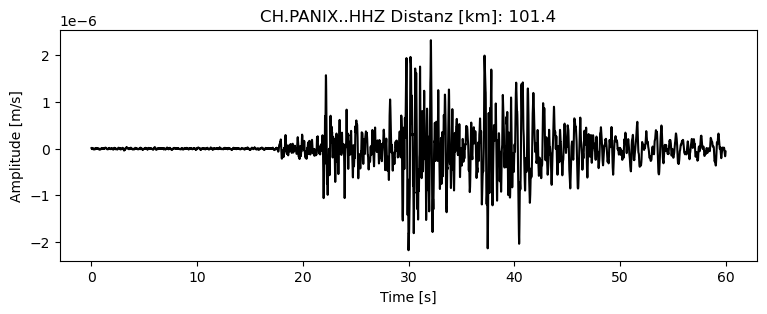

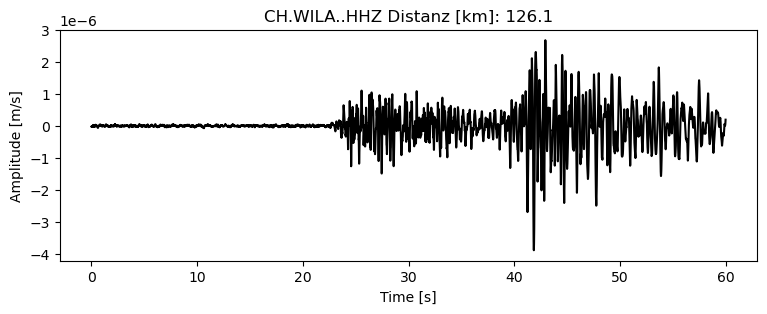

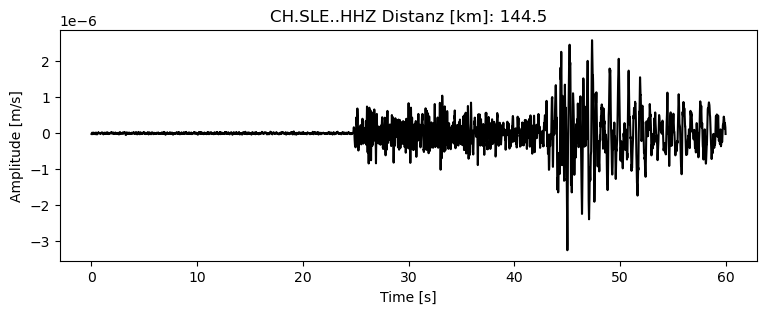

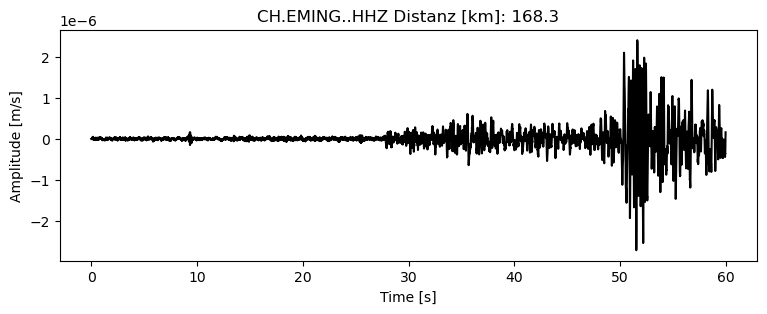

In [16]:
def preprocess(time, seconds, network, station, channel):
    stream = Client("ETH").get_waveforms(
    network=network,
    station=station,
    location="*",
    channel=channel,   #
    starttime=time-30,
    endtime=time++seconds+30,
    attach_response=True
    )
    stream.remove_response(output="VEL")
    stream.filter("bandpass",freqmin=1,freqmax=30)
    return stream.trim(time, time+seconds).merge()


time = UTCDateTime("2025-07-22T15:51:21")
seconds = 60


trace_LAUCH = preprocess(time, seconds, "CH", "LAUCH", "HHZ")[0]
trace_SFRS = preprocess(time, seconds, "CH", "SFRS", "HGZ")[0]
trace_WIMIS = preprocess(time, seconds, "CH", "WIMIS", "HHZ")[0]
trace_FIESA = preprocess(time, seconds, "CH", "FIESA", "HHZ")[0]
trace_HASLI = preprocess(time, seconds, "CH", "HASLI", "HHZ")[0]
trace_GRIMS = preprocess(time, seconds, "CH", "GRIMS", "HHZ")[0]
trace_STSW2 = preprocess(time, seconds, "CH", "STSW2", "HGZ")[0]
trace_VANNI = preprocess(time, seconds, "CH", "VANNI", "HHZ")[0]
trace_JAUN = preprocess(time, seconds, "CH", "JAUN", "HHZ")[0]
trace_MMK = preprocess(time, seconds, "CH", "MMK", "HHZ")[0]
trace_DIX = preprocess(time, seconds, "CH", "DIX", "HHZ")[0]
trace_GRYON = preprocess(time, seconds, "CH", "GRYON", "HHZ")[0]
trace_DAGMA = preprocess(time, seconds, "CH", "DAGMA", "HHZ")[0]
trace_MOUTI = preprocess(time, seconds, "CH", "MOUTI", "HHZ")[0]
trace_PANIX = preprocess(time, seconds, "CH", "PANIX", "HHZ")[0]
trace_WILA = preprocess(time, seconds, "CH", "WILA", "HHZ")[0]
trace_SLE = preprocess(time, seconds, "CH", "SLE", "HHZ")[0]
trace_EMING = preprocess(time, seconds, "CH", "EMING", "HHZ")[0]

distances = {"LAUCH":15.1,
             "SFRS":15.4,
             "WIMIS":22.0,
             "FIESA":23.2,
             "HASLI":33.3,
             "GRIMS":36.2,
             "STSW2":38.5,
             "VANNI":41.5,
             "JAUN":43.8,
             "MMK":55.2,
             "DIX":61.2,
             "GRYON":65.1,
             "DAGMA":77.7,
             "MOUTI":92.6,
             "PANIX":101.4,
             "WILA":126.1,
             "SLE":144.5,
             "EMING":168.3,

            }

traces = [
    trace_LAUCH, trace_SFRS, trace_WIMIS, trace_FIESA, trace_HASLI,
    trace_GRIMS, trace_STSW2, trace_VANNI, trace_JAUN,
    trace_MMK, trace_DIX, trace_GRYON, trace_DAGMA,
    trace_MOUTI, trace_PANIX , trace_WILA, trace_SLE, trace_EMING
]


plt.close("all")
peak_amplitude_list = []
distance_list = []
for trace in traces:

    plt.figure(figsize=(9,3))
    plt.plot(trace.times(),trace.data,color="k")
    distance = distances[trace.stats.station]
    plt.title(trace.id + " Distanz [km]: " + str(distance))
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [m/s]")

    plt.show()

    peak_amplitude_list.append(np.max(np.abs(trace.data)))
    distance_list.append(distance)



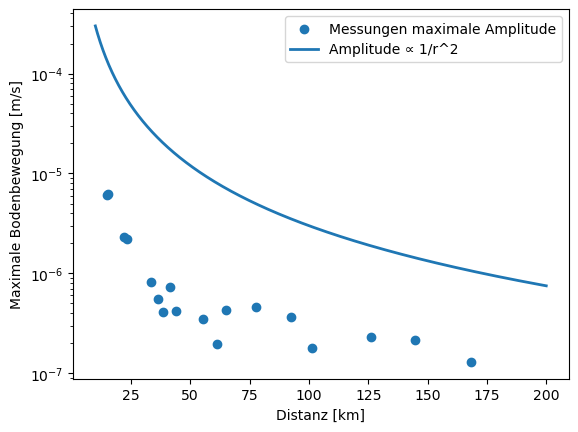

Text(0.5, 1.0, 'Median Magnitude: 1.8  // Magnitude SED: Mlhc 3.3')

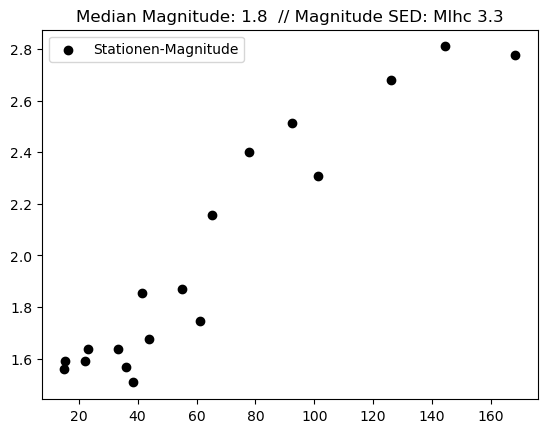

In [14]:
plt.scatter(distance_list,peak_amplitude_list,label="Messungen maximale Amplitude")
plt.yscale("log")
plt.ylabel("Maximale Bodenbewegung [m/s]")

plt.xlabel("Distanz [km]")

r = np.linspace(10, 200, 1000)   # km
A = 1.0 / r**2                     # 1/distance
# linear plot
plt.plot(r, 0.03*A, lw=2, label='Amplitude ∝ 1/r^2')
plt.legend()

plt.show()




Text(0.5, 1.0, 'Median Magnitude: 1.8  // Magnitude SED: Mlhc 3.3')

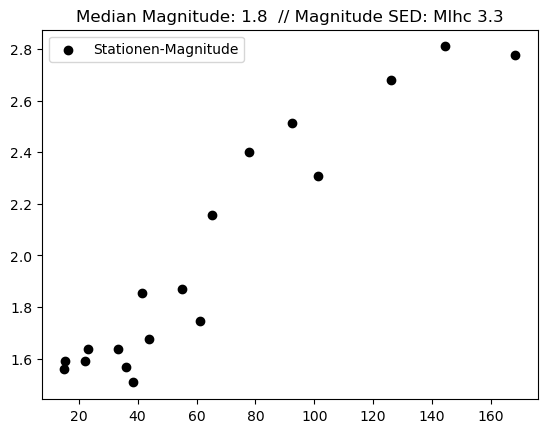

In [15]:

# Magnituden
magnituden_list = []
for dist, ampl in zip(distance_list,peak_amplitude_list):
    ampl_micrometer = ampl * 1e6

    # Richter Magnitudenskala (empirisch)
    magnituden_list.append(np.log10(ampl_micrometer) -2.48 + 2.76 * np.log10(dist))

plt.scatter(distance_list, magnituden_list,color="k",label="Stationen-Magnitude")
plt.legend()
plt.title(f"Median Magnitude: {np.median(magnituden_list):.1f}  // Magnitude SED: Mlhc 3.3")


In [46]:
# Und das Seismogram noch kürzen
stream.trim(start_time, start_time+20);

# Und es erneut plotten
stream.plot();

# Frage: Welche Wellentypen können erkannt werden, und auf welcher Komponente?

Period  182 s → Band 0.0039–0.0078 Hz (≈ 128.7–257.4 s)


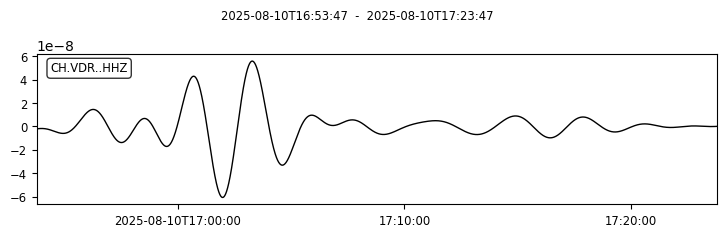

Period  128 s → Band 0.0055–0.0110 Hz (≈ 90.5–181.0 s)


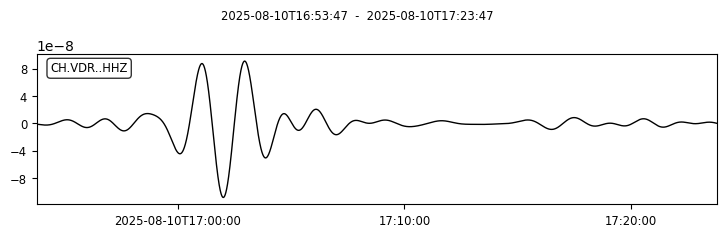

Period   90 s → Band 0.0079–0.0157 Hz (≈ 63.6–127.3 s)


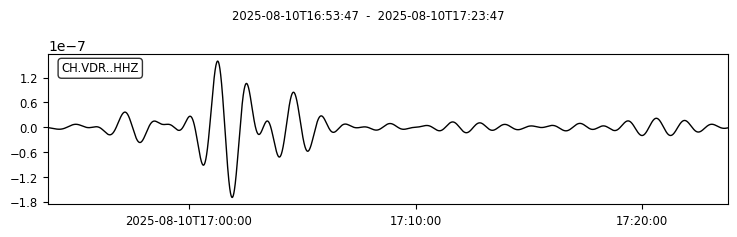

Period   64 s → Band 0.0110–0.0221 Hz (≈ 45.3–90.5 s)


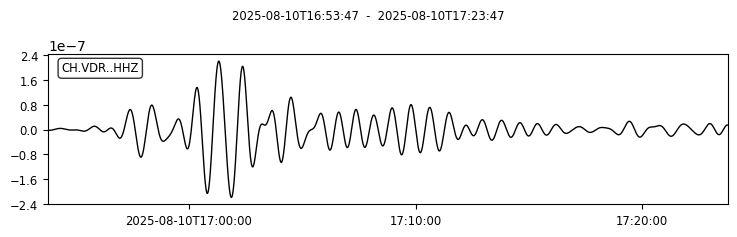

Period   45 s → Band 0.0157–0.0314 Hz (≈ 31.8–63.6 s)


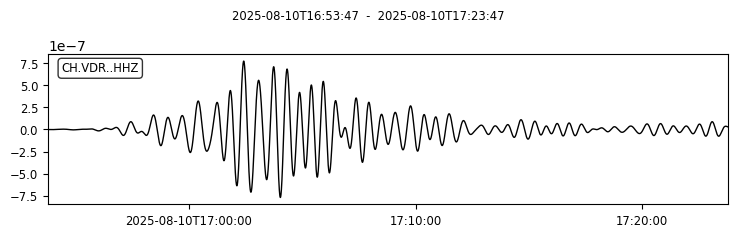

Period   32 s → Band 0.0221–0.0442 Hz (≈ 22.6–45.3 s)


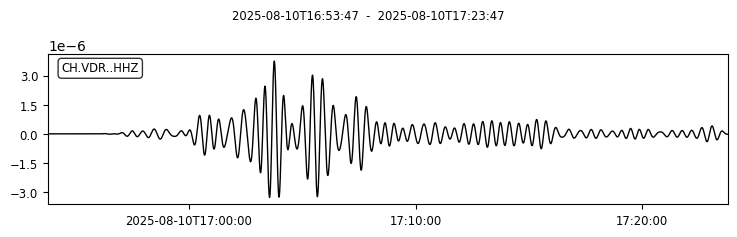

Period   22 s → Band 0.0321–0.0643 Hz (≈ 15.6–31.1 s)


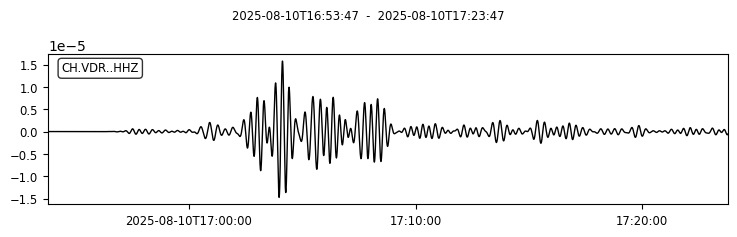

Period   16 s → Band 0.0442–0.0884 Hz (≈ 11.3–22.6 s)


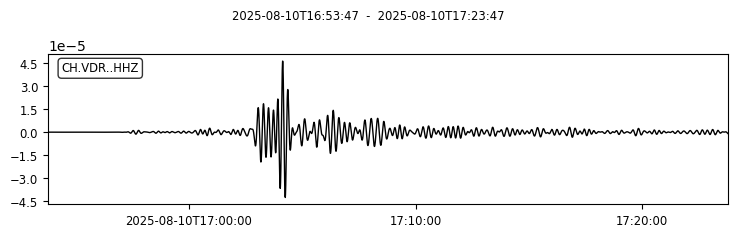

Period   11 s → Band 0.0643–0.1286 Hz (≈ 7.8–15.6 s)


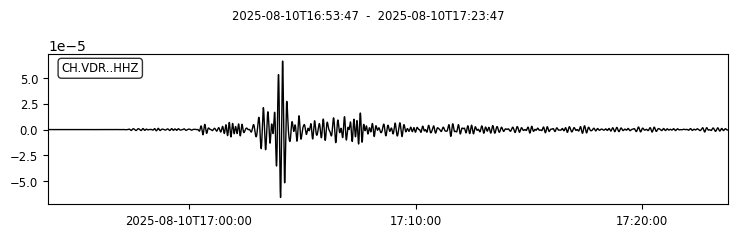

Period    8 s → Band 0.0884–0.1768 Hz (≈ 5.7–11.3 s)


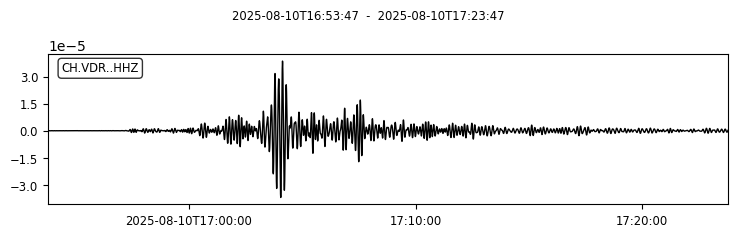

Period    4 s → Band 0.1768–0.3536 Hz (≈ 2.8–5.7 s)


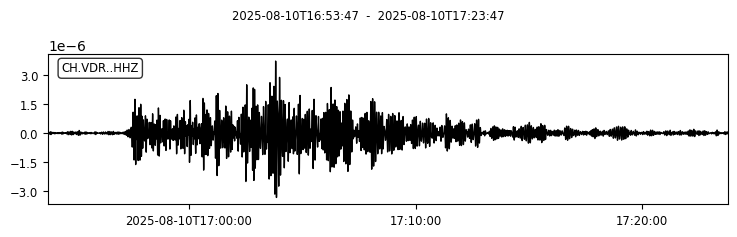

Period    2 s → Band 0.3536–0.7071 Hz (≈ 1.4–2.8 s)


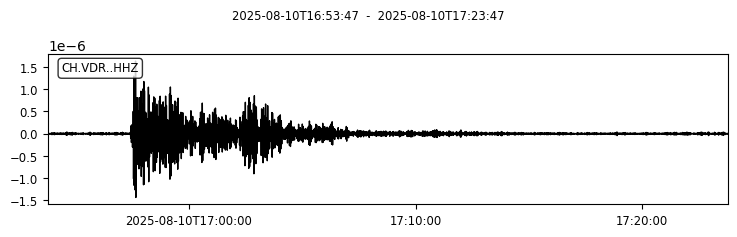

Period    1 s → Band 0.7071–1.4142 Hz (≈ 0.7–1.4 s)


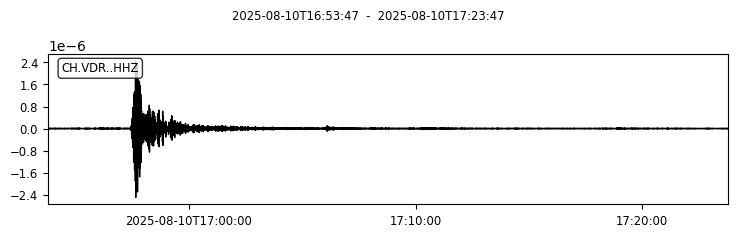

Period  0.5 s → Band 1.4142–2.8284 Hz (≈ 0.4–0.7 s)


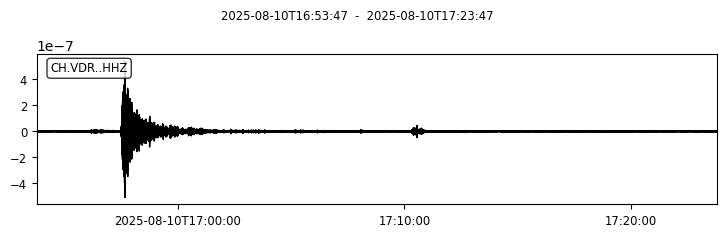

Period 0.25 s → Band 2.8284–5.6569 Hz (≈ 0.2–0.4 s)


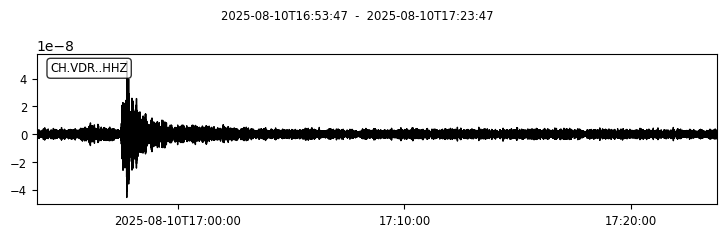

Period 0.125 s → Band 5.6569–11.3137 Hz (≈ 0.1–0.2 s)


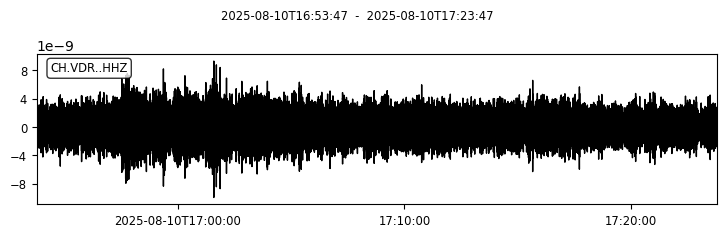

In [49]:
# Wir können einen Zeitpunkt eingeben von dem wir Daten laden wollen, z.B. die Zeit nach dem Mw 8.8 Kamchatka Erdbeben im July 2025
start_time = UTCDateTime("2025-07-29T23:24:51")

# Und dann laden wir Daten von einem bestimmten Seismometer zu diesem Zeitpunkt herunter.
# Um den Seismometer zu identifizieren hat jeder Sensor einen Code aus
# Netzwerk (network) z.B. "CH" das Schweiz. Netwerk
# Station (station) z.B. "LAUCH"
# Kanal (channel) z.B. "HHZ" was der Aufzeichnung entlang der vertikalen Richtung/Komponente eines Breitbandseismometers entspricht
# Siehe auch https://networks.seismo.ethz.ch/en/networks/ch/

# Die Daten werden in einem Stream gespeichert,
# welcher ein oder mehrere Seismogramme, sowie Metadaten wie Informationen über den Seismometer und Zeiten, enthält

stream = client.get_waveforms(
    network="CH",
    station="VDR",
    location="*",
    channel="HHZ",   # Z: vertical components N: North components  E: East components
    starttime=start_time,
    endtime=start_time+2*3600,
    attach_response=True
).merge()

# Desweiteren bereiten wir die Daten vor, dieser Schritt wandelt die Aufzeichnungen des Seismometers in physikalische Einheiten um
# hier in Meter pro Sekunde (Velocity)
stream.remove_response(output="VEL")

# Letzendlich können wir das ausgewählte Seismogram plotten
stream.plot();


In [28]:
# Wir filtern das Seismogramme in verschiedenen Frequenzbändern (oder Perioden in Sekunden)
periods = [182, 128, 90, 64, 45, 32, 22, 16, 11, 8, 4, 2, 1, 0.5, 0.25][::-1]

stream_filt = stream.copy()

n = len(periods)+1

fig, axes = plt.subplots(n, 1, figsize=(10, n*3))
axes = axes.flatten()


# --- unfiltered trace ---
st_unf = stream_filt.copy()
st_unf.trim(start_time, start_time + 3*3600)
tr = st_unf[0]
t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
axes[0].plot(t, tr.data, lw=0.7)
axes[0].set_title("Unfiltered", fontsize=14)

for i, T in enumerate(periods,start=1):
    f_c = 1.0 / T
    fmin = f_c / np.sqrt(2)
    fmax = f_c * np.sqrt(2)

    st_band = stream_filt.copy()
    st_band.filter("bandpass", freqmin=fmin, freqmax=fmax,
                   corners=4, zerophase=True)
    st_band.trim(start_time, start_time + 3*3600)

    tr = st_band[0]  # assuming one trace in stream
    t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
    axes[i].plot(t, tr.data, lw=0.7)
    axes[i].set_title(f"Filtered data: T={T}s  ({fmin:.3f}-{fmax:.3f} Hz)", fontsize=14)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

for ax in axes:

    ax.set_xlim(t[0],t[-1])
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude [m/s]")

plt.tight_layout()
plt.show()

5 Event(s) in Catalog:
2025-07-30T01:42:35.022964Z | +47.299,   +8.438 | 2.97 MLhc | manual
2025-07-29T09:42:56.710049Z | +47.619,   +7.825 | 2.62 MLhc | manual
2025-07-28T13:48:21.323146Z | +47.618,   +7.824 | 3.08 MLhc | manual
2025-07-22T15:51:21.146842Z | +46.541,   +7.848 | 3.29 MLhc | manual
2025-07-21T10:52:16.706137Z | +46.540,   +7.859 | 4.18 MLhc | manual


ImportError: Cartopy could not be imported.

Using event at 2025-07-30T01:42:35.022964Z M2.967159696 Lat 47.29902679, Lon 8.437549525
Inventory created at 2025-08-19T13:51:53.464026Z
	Sending institution: SeisComP (SED)
	Contains:
		Networks (1):
			CH
		Stations (123):
			CH.ACB (Klingnau, Acheberg, AG)
			CH.BALST (Balsthal, SO)
			CH.BERGE (Lenzkirch, Germany)
			CH.BLOTZ (Kappelen, Rue du Rhin, France)
			CH.BNALP (Bannalp, NW)
			CH.BOBI (Boebikon, Wasserreservoir Allmend, AG)
			CH.BOURR (Bourrignon, JU)
			CH.BULAC (Bülach, ZH)
			CH.DAGMA (Dagmersellen, Lutertal, LU)
			CH.EMING (Emmingen, Germany)
			CH.EMMET (Emmethof, AG)
			CH.EWZT0 (Zuerich, Triemli, ZH)
			CH.EWZT2 (Wettswil, ZH)
			CH.FIESA (Fiescheralp, VS)
			CH.FLACH (Felsenburg, Rüdlingen, SH)
			CH.FUSIO (Fusio, TI)
			CH.GRIMS (Grimsel, Gerstenegg, BE)
			CH.HAMIK (Haemikon, Daelikerfeld, LU)
			CH.HASLI (Hasliberg, BE)
			CH.HAUIG (Lörrach, Café Hygge Rechberg, Deutschland)
			CH.LIENZ (Kamor, SG)
			CH.LLS (Linth-Limmern, GL)
			CH.MATTE (Basel, Schuetzenma

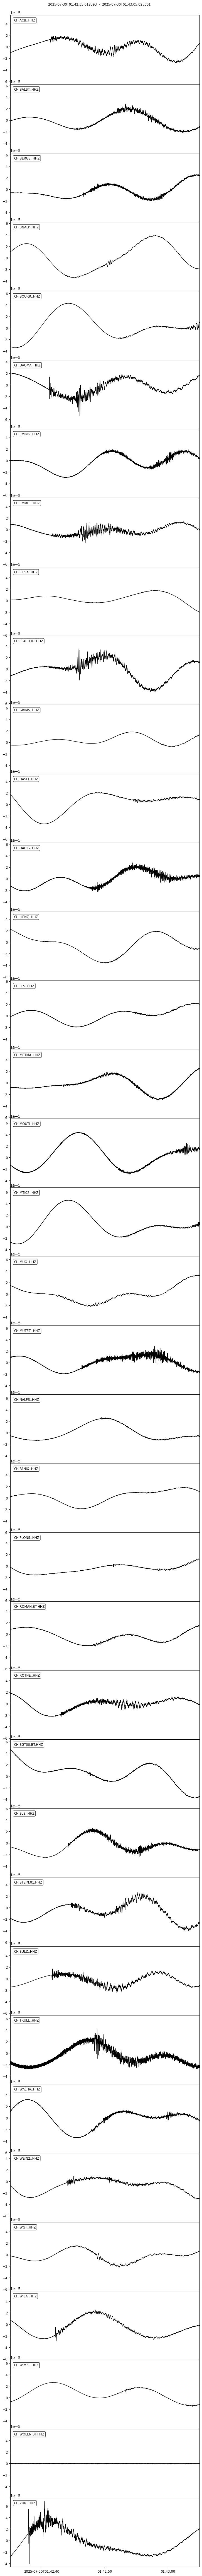

In [14]:
def preprocess(time, seconds, network, station, channel):
    stream = Client("ETH").get_waveforms(
    network=network,
    station=station,
    location="*",
    channel=channel,   #
    starttime=time-30,
    endtime=time++seconds+30,
    attach_response=True
    )
    stream.remove_response(output="DISP")
    stream.filter("bandpass",freqmin=1,freqmax=30)
    return stream.trim(time, time+seconds).merge()


time = UTCDateTime("2025-07-22T15:51:21")
seconds = 60


trace_LAUCH = preprocess(time, seconds, "CH", "LAUCH", "HHZ")[0]
trace_SFRS = preprocess(time, seconds, "CH", "SFRS", "HGZ")[0]
trace_WIMIS = preprocess(time, seconds, "CH", "WIMIS", "HHZ")[0]
trace_FIESA = preprocess(time, seconds, "CH", "FIESA", "HHZ")[0]
trace_HASLI = preprocess(time, seconds, "CH", "HASLI", "HHZ")[0]
trace_GRIMS = preprocess(time, seconds, "CH", "GRIMS", "HHZ")[0]
trace_STSW2 = preprocess(time, seconds, "CH", "STSW2", "HGZ")[0]
trace_VANNI = preprocess(time, seconds, "CH", "VANNI", "HHZ")[0]
trace_JAUN = preprocess(time, seconds, "CH", "JAUN", "HHZ")[0]
trace_MMK = preprocess(time, seconds, "CH", "MMK", "HHZ")[0]
trace_DIX = preprocess(time, seconds, "CH", "DIX", "HHZ")[0]
trace_GRYON = preprocess(time, seconds, "CH", "GRYON", "HHZ")[0]
trace_DAGMA = preprocess(time, seconds, "CH", "DAGMA", "HHZ")[0]
trace_MOUTI = preprocess(time, seconds, "CH", "MOUTI", "HHZ")[0]
trace_PANIX = preprocess(time, seconds, "CH", "PANIX", "HHZ")[0]
trace_WILA = preprocess(time, seconds, "CH", "WILA", "HHZ")[0]
trace_SLE = preprocess(time, seconds, "CH", "SLE", "HHZ")[0]
trace_EMING = preprocess(time, seconds, "CH", "EMING", "HHZ")[0]

distances = {"LAUCH":15.1,
             "SFRS":15.4,
             "WIMIS":22.0,
             "FIESA":23.2,
             "HASLI":33.3,
             "GRIMS":36.2,
             "STSW2":38.5,
             "VANNI":41.5,
             "JAUN":43.8,
             "MMK":55.2,
             "DIX":61.2,
             "GRYON":65.1,
             "DAGMA":77.7,
             "MOUTI":92.6,
             "PANIX":101.4,
             "WILA":126.1,
             "SLE":144.5,
             "EMING":168.3,

            }

traces = [
    trace_LAUCH, trace_SFRS, trace_WIMIS, trace_FIESA, trace_HASLI,
    trace_GRIMS, trace_STSW2, trace_VANNI, trace_JAUN,
    trace_MMK, trace_DIX, trace_GRYON, trace_DAGMA,
    trace_MOUTI, trace_PANIX , trace_WILA, trace_SLE, trace_EMING
]


peak_amplitude_list = []
distance_list = []
for trace in traces:

    plt.figure(figsize=(9,3))
    plt.plot(trace.times(),trace.data,color="k")
    distance = distances[trace.stats.station]
    plt.title(trace.id + " Distanz [km]: " + str(distance))
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [m/s]")

    plt.show()

    peak_amplitude_list.append(np.max(np.abs(trace.data)))
    distance_list.append(distance)


    plt.scatter(distance_list,peak_amplitude_list,label="Messungen maximale Amplitude")
plt.yscale("log")
plt.ylabel("Maximale Bodenbewegung [m/s]")

plt.xlabel("Distanz [km]")

r = np.linspace(10, 200, 1000)   # km
A = 1.0 / r**2                     # 1/distance
# linear plot
plt.plot(r, 0.03*A, lw=2, label='Amplitude ∝ 1/r^2')
plt.legend()

plt.show()


# Magnituden
magnituden_list = []
for dist, ampl in zip(distance_list,peak_amplitude_list):
    ampl_micrometer = ampl * 1e6

    # Richter Magnitudenskala (empirisch)
    magnituden_list.append(np.log10(ampl_micrometer) -2.48 + 2.76 * np.log10(dist))

plt.scatter(distance_list, magnituden_list,color="k",label="Stationen-Magnitude")
plt.legend()
plt.title(f"Median Magnitude: {np.median(magnituden_list):.1f}  // Magnitude SED: Mlhc 3.3")


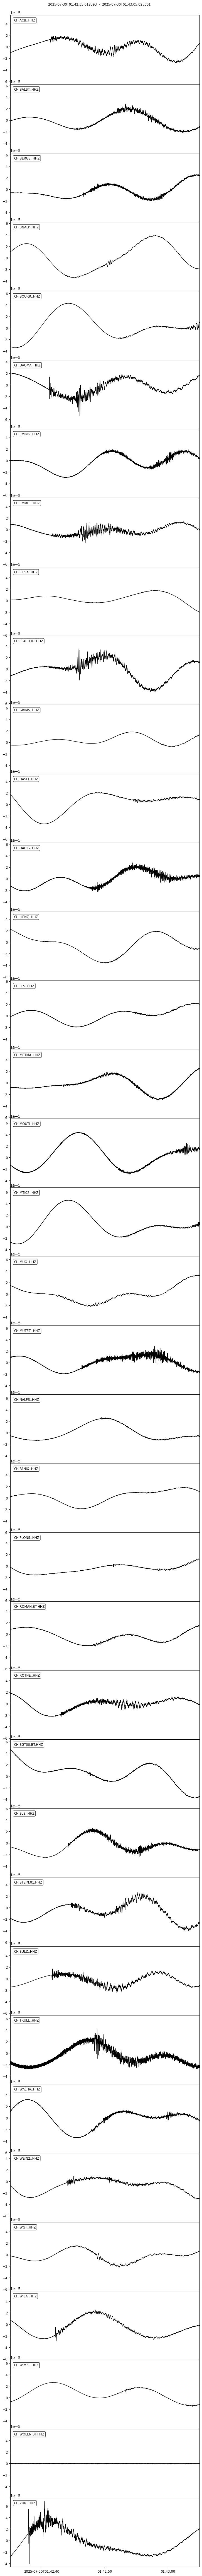

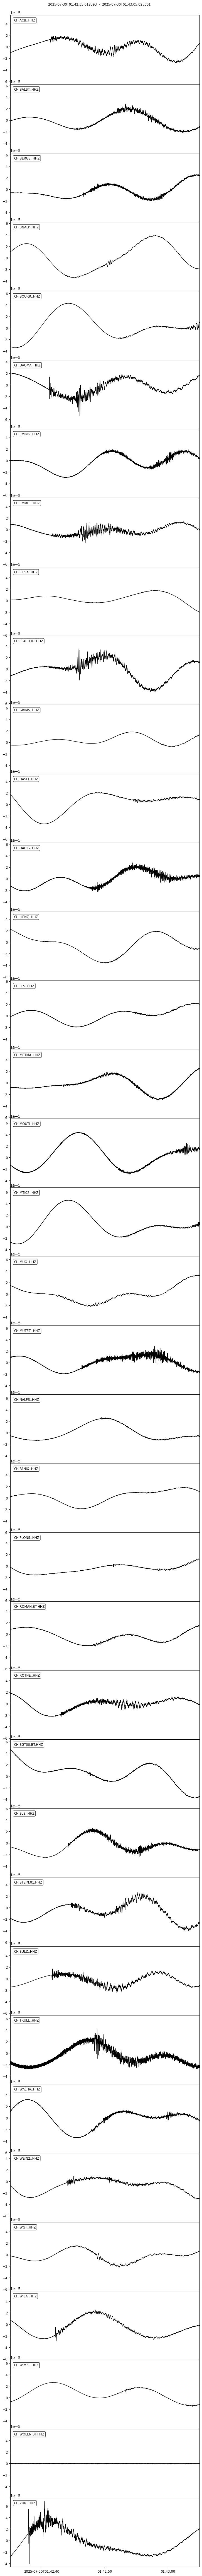

In [16]:
st.plot()